# Analysis of Iterative Optimization Results

## Imports

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [95]:
dir_path = "files/Genetic_Display"

# TODO: Import as CSV here
grep = pd.read_csv(f"{dir_path}/grep-Genetic-None-0.csv", index_col=[0])
fluid = pd.read_csv(f"{dir_path}/fluid-Genetic-None-0.csv", index_col=[0])

tables = {"grep": grep, "fluid": fluid}

## Improvements

### Normalization (Z-Score)

In [96]:
normalized_tables = {}
tick_labels = []

for t_name, t in tables.items():
    
    temp_table = t.copy()
    temp_table ["Fitness"] = (temp_table ["Fitness"] - temp_table ["Fitness"].mean())/temp_table ["Fitness"].std()
    temp_table .drop(columns=["Mode"])
    normalized_tables[t_name] = temp_table

### Normalization (-O2)

In [97]:
normalized_tables_o2 = {}
tick_labels_o2 = []

for t_name, t in tables.items():
    # print(t)
    
    temp_table = t.copy()
    
    normalize_around = temp_table[temp_table["ID"] == "-02"].iloc[0]["Fitness"]
    offset = normalize_around - temp_table["Fitness"].mean()
    temp_table ["Fitness"] = (temp_table["Fitness"] - normalize_around)/temp_table["Fitness"].std()
    temp_table .drop(columns=["Mode"])
    normalized_tables_o2[t_name] = temp_table

3.912
0.007761904761904415
2.467
-0.01080952380952338


## Plots

### Z-Score

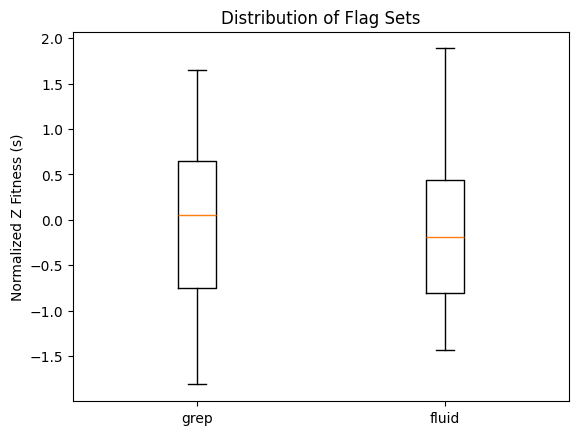

In [98]:
fig, ax = plt.subplots()

lst1 = []

for t in normalized_tables.values():
    lst1.append(t["Fitness"])

ax.boxplot(lst1)
ax.set_xticklabels(normalized_tables.keys())
ax.set_ylabel("Normalized Z Fitness (s)")
ax.set_title("Distribution of Flag Sets")

plt.show()

### -O2 Centered

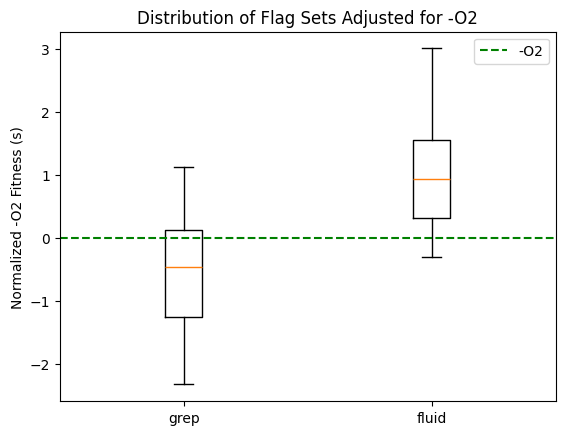

In [99]:
fig, ax = plt.subplots()

lst1 = []

for t in normalized_tables_o2.values():
    lst1.append(t["Fitness"])

ax.boxplot(lst1)
ax.set_xticklabels(normalized_tables_o2.keys())
ax.set_ylabel("Normalized -O2 Fitness (s)")
ax.set_title("Distribution of Flag Sets Adjusted for -O2")
ax.axhline(0, c="g", ls="--", label="-O2")
ax.legend()

plt.show()